<a href="https://colab.research.google.com/github/kartiknarayansahoo/deep_learning_specialization/blob/main/jovian-dl/Lesson%203%20-%20Training%20deep%20neural%20networks%20on%20a%20GPU/Lesson_3_Original_Jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline of this notebook
- In the previous lesson, we trained a logistic regression model, on the MNIST dataset, which did not give us an accuracy beyond 86%, as the model assumed linear relationship between the pixel intensities and the image labels

- In this notebook, we will improve upon the model bu the use of a feed-forward neural network, which will capture the non-linear relationships between inputs and targets.

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



image.shape: torch.Size([1, 28, 28])
Label: 5


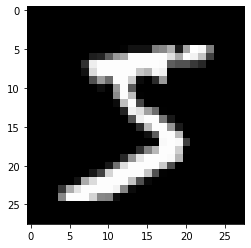

In [5]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image[0,:,:], cmap='gray')
print('Label:', label)

image.shape: torch.Size([1, 28, 28])


TypeError: ignored

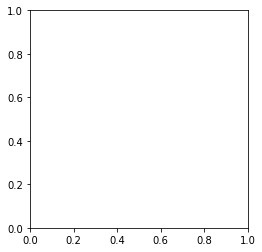

In [11]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [6]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [7]:
batch_size=128

In [9]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])


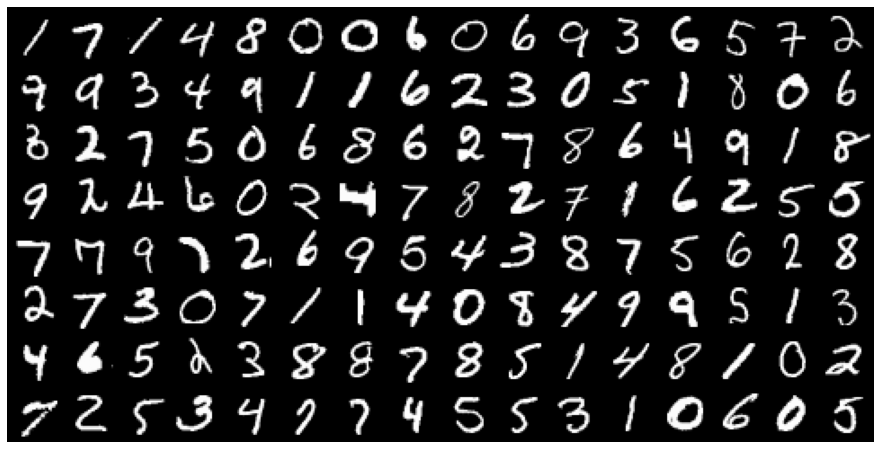

In [10]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Hidden Layers, Activation functions and Non-linearity
- our neural network is of the form
- 728 (inputs) -> 32 -> 10(outputs)

In [12]:
for images, labels in train_loader:
    print('images.shape: ', images.shape)
    inputs = images.reshape(-1, 28*28)
    print('inputs.shape: ', inputs.shape)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape:  torch.Size([128, 1, 28, 28])
inputs.shape:  torch.Size([128, 784])


In [13]:
input_size = inputs.shape[-1]
hidden_size = 32

In [15]:
layer1 = nn.Linear(input_size, hidden_size)

In [16]:
inputs.shape

torch.Size([128, 784])

In [19]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [17]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [21]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

## Using ReLU as the activation function
- before the use of the ReLU function, our inputs and the outputs had a linear relationship
- using the ReLU function as the activation function, we introduce non-linearlity between the outputs and the inputs

In [25]:
F.relu(torch.tensor([[1, -1, 0],
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [26]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.8806561231613159
min(relu_outputs): 0.0


In [27]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [28]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [29]:
inputs.shape

torch.Size([128, 784])

In [30]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3109, grad_fn=<NllLossBackward0>)

In [31]:
# expanded version of layer(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [32]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

# Details about the model
- as the model now doesn't have linear relationship due to the ReLU function, as we train the model and adjust the weights of layer1 and layer2, we will be able to capture the non-linear relationships between the images and their labels
- in short, introducing non-linearity in our model makes it more powerful and versatile
- hence hidden_size does not depend on the dimensions of the inputs or outputs, we change it to increase the number of parameters within the model
- we can also introduce additional hidden layers and apply different activation functions

# Creating the model

In [38]:
class MnistModel(nn.Module):
    """Feedforward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0),-1)
        # get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # apply activation function
        out = F.relu(out)
        # get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss' : loss, 'val_acc' : acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [39]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
input_size = 1*28*28
hidden_size = 32
num_classes = 10

In [41]:
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)

In [42]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [43]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss: ', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss:  2.301265239715576
outputs.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[-0.0772, -0.0567,  0.0583, -0.0725, -0.1661, -0.0614,  0.1200, -0.1600,
         -0.1561,  0.1168],
        [-0.0559, -0.0425,  0.0532, -0.1091, -0.2270, -0.1117,  0.1344, -0.0817,
         -0.1126, -0.0387]])


# Using a GPU

In [44]:
torch.cuda.is_available()

False

In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [47]:
device = get_default_device()
device

device(type='cpu')

In [48]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [49]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
cpu


In [50]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [51]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [52]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [53]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([4, 5, 7, 1, 8, 1, 4, 5, 7, 7, 4, 7, 9, 1, 3, 3, 9, 6, 5, 7, 1, 0, 4, 0,
        5, 6, 1, 3, 8, 0, 7, 3, 1, 5, 6, 2, 5, 1, 5, 4, 2, 2, 5, 3, 7, 2, 1, 6,
        8, 0, 5, 0, 0, 8, 4, 0, 5, 7, 7, 5, 7, 8, 8, 4, 7, 9, 0, 2, 0, 7, 6, 9,
        7, 1, 7, 8, 3, 9, 1, 3, 3, 8, 5, 7, 2, 0, 9, 0, 3, 6, 9, 4, 2, 4, 7, 0,
        7, 7, 9, 1, 3, 7, 7, 5, 2, 1, 2, 3, 3, 0, 6, 6, 0, 1, 1, 2, 3, 9, 1, 3,
        4, 1, 5, 3, 3, 1, 3, 5, 9, 1, 4, 3, 9, 7, 0, 7, 1, 7, 3, 7, 2, 8, 1, 9,
        1, 6, 2, 9, 7, 9, 4, 3, 2, 2, 8, 3, 2, 8, 6, 0, 3, 4, 7, 1, 0, 3, 4, 2,
        2, 1, 5, 9, 0, 0, 3, 0, 1, 7, 0, 5, 7, 5, 4, 1, 3, 6, 5, 4, 8, 4, 8, 4,
        2, 4, 6, 6, 1, 3, 3, 4, 3, 4, 7, 8, 3, 5, 5, 7, 2, 2, 6, 4, 1, 0, 8, 7,
        3, 1, 0, 1, 2, 9, 2, 9, 2, 9, 7, 5, 0, 9, 6, 2, 1, 0, 8, 2, 7, 8, 4, 1,
        2, 3, 8, 1, 8, 9, 6, 2, 9, 7, 5, 6, 1, 9, 6, 5])


# Training the model

In [54]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [55]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [56]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3123250007629395, 'val_acc': 0.08652343600988388}]

In [57]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2439, val_acc: 0.9293
Epoch [1], val_loss: 0.1752, val_acc: 0.9485
Epoch [2], val_loss: 0.1483, val_acc: 0.9551
Epoch [3], val_loss: 0.1420, val_acc: 0.9584
Epoch [4], val_loss: 0.1632, val_acc: 0.9513


In [58]:
# 96% is pretty good! Let's train the model for five more epochs at a lower 
# learning rate of 0.1 to improve the accuracy further.
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1206, val_acc: 0.9652
Epoch [1], val_loss: 0.1205, val_acc: 0.9641
Epoch [2], val_loss: 0.1186, val_acc: 0.9663
Epoch [3], val_loss: 0.1177, val_acc: 0.9665
Epoch [4], val_loss: 0.1181, val_acc: 0.9662


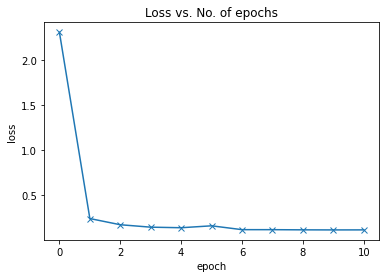

In [59]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

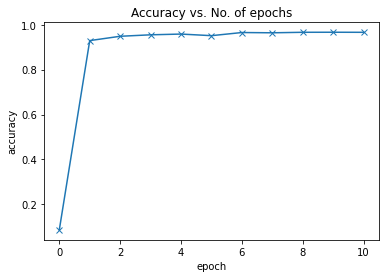

In [60]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [61]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [62]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


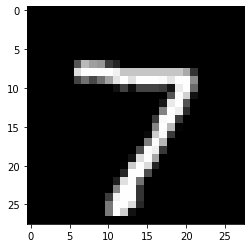

In [63]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


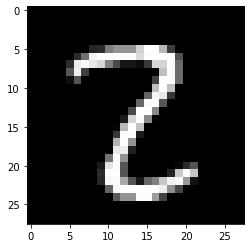

In [64]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


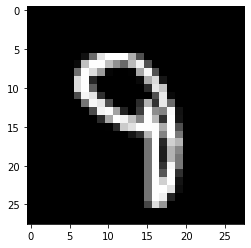

In [65]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [66]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10287608206272125, 'val_acc': 0.9688476324081421}